In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.preprocessing import MinMaxScaler
from keras.models import Sequential
from keras.layers import Dense,LSTM

In [2]:
import yfinance as yf

In [3]:
#Download Tata motors data from yahoo finance
df = yf.download('TATAMOTORS.NS')

[*********************100%***********************]  1 of 1 completed


In [4]:
#first 5 samples
df.head()

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
1995-12-25,72.819626,72.819626,72.819626,72.819626,53.472775,0
1995-12-26,72.819626,72.819626,72.819626,72.819626,53.472775,0
1995-12-27,72.819626,72.819626,72.819626,72.819626,53.472775,0
1995-12-28,72.819626,72.819626,72.819626,72.819626,53.472775,0
1995-12-29,72.819626,72.819626,72.819626,72.819626,53.472775,0


In [5]:
# to check dates in index
df.index

DatetimeIndex(['1995-12-25', '1995-12-26', '1995-12-27', '1995-12-28',
               '1995-12-29', '1996-01-01', '1996-01-02', '1996-01-03',
               '1996-01-04', '1996-01-05',
               ...
               '2023-05-19', '2023-05-22', '2023-05-23', '2023-05-24',
               '2023-05-25', '2023-05-26', '2023-05-29', '2023-05-30',
               '2023-05-31', '2023-06-01'],
              dtype='datetime64[ns]', name='Date', length=6900, freq=None)

In [6]:
# to check features or columns 
df.columns

Index(['Open', 'High', 'Low', 'Close', 'Adj Close', 'Volume'], dtype='object')

In [7]:
df.tail()

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2023-05-26,514.900024,519.750000,512.200012,518.450012,518.450012,8360570
2023-05-29,525.000000,525.099976,519.700012,521.450012,521.450012,6596504
2023-05-30,521.450012,523.500000,518.000000,518.799988,518.799988,5134688
2023-05-31,519.950012,527.500000,516.400024,526.299988,526.299988,12327284
2023-06-01,527.500000,536.250000,522.849976,535.200012,535.200012,12499168


In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 6900 entries, 1995-12-25 to 2023-06-01
Data columns (total 6 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Open       6900 non-null   float64
 1   High       6900 non-null   float64
 2   Low        6900 non-null   float64
 3   Close      6900 non-null   float64
 4   Adj Close  6900 non-null   float64
 5   Volume     6900 non-null   int64  
dtypes: float64(5), int64(1)
memory usage: 377.3 KB


In [9]:
df.isnull().sum()

Open         0
High         0
Low          0
Close        0
Adj Close    0
Volume       0
dtype: int64

In [10]:
df.isna().sum()

Open         0
High         0
Low          0
Close        0
Adj Close    0
Volume       0
dtype: int64

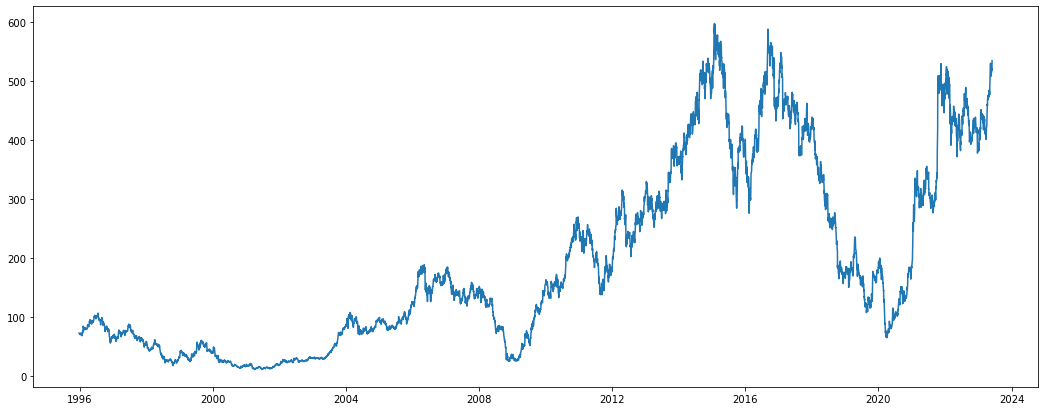

In [11]:
# plot a graph of tata motors 
plt1 = plt.figure(figsize=(18,7))
import matplotlib.pyplot as plt
plt.plot(df['Close'])

In [12]:
# check open price for first day and close price for last day
print("Starting price: ",df.iloc[0][0])
print("Ending price: ", df.iloc[-1][3])

Starting price:  72.81962585449219
Ending price:  535.2000122070312


In [13]:
# check start date and end date in our dataset
print("Starting date: ",df.index[0])
print("Ending date: ", df.index[-1])

Starting date:  1995-12-25 00:00:00
Ending date:  2023-06-01 00:00:00


In [14]:
# drop all columns except 'close ' columns as we are going to do prediction only on closing price
df.drop(columns=['Open','High','Low','Adj Close','Volume'],inplace=True)

In [15]:
df.head()

,Close
Date,
1995-12-25,72.819626
1995-12-26,72.819626
1995-12-27,72.819626
1995-12-28,72.819626
1995-12-29,72.819626


In [16]:
# Resample the data to weekly frequency.we can use mean or last
df = df.resample('W').mean()

In [17]:
df.head()

,Close
Date,
1995-12-31,72.819626
1996-01-07,72.068434
1996-01-14,71.526120
1996-01-21,72.150836
1996-01-28,70.113802


In [18]:
df.tail()

,Close
Date,
2023-05-07,480.462502
2023-05-14,508.240002
2023-05-21,520.180005
2023-05-28,520.900000
2023-06-04,525.437500


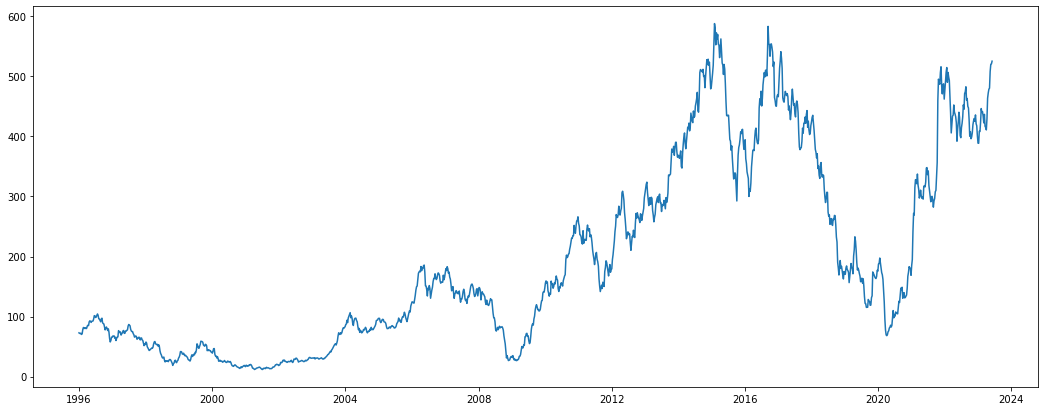

In [19]:
# plot a chart for tata motors
plt1 = plt.figure(figsize=(18,7))
import matplotlib.pyplot as plt
plt.plot(df['Close'])

In [20]:
# LSTM are sensitive to the scale of the data. so we apply MinMax scaler 
# Preprocess the data
from sklearn.preprocessing import MinMaxScaler

scaler=MinMaxScaler(feature_range=(0,1))
df1=scaler.fit_transform(np.array(df).reshape(-1,1))

In [21]:
df1

array([[0.10595512],
       [0.10465168],
       [0.10371067],
       ...,
       [0.88220352],
       [0.88345283],
       [0.89132619]])

In [22]:
# Split data into training and testing sets
train_size=int(len(df1)*0.7)
test_size=len(df1)-train_size
train_data,test_data=df1[0:train_size,:],df1[train_size:len(df1),:1]

In [23]:
train_size,test_size

(1002, 430)

In [24]:
train_data

array([[0.10595512],
       [0.10465168],
       [0.10371067],
       ...,
       [0.97313267],
       [0.95561312],
       [0.96841159]])

In [25]:
# convert an array of values into a dataset matrix
#function to create new dataset which is required by LSTM.giving sequence of data to our LSTM model
def create_dataset(dataset, time_step=1):
    dataX, dataY = [], []
    for i in range(len(dataset)-time_step-1):
        a = dataset[i:(i+time_step), 0]   ###i=0, 0,1,2,3-----99   100 
        dataX.append(a)
        dataY.append(dataset[i + time_step, 0])
    return np.array(dataX), numpy.array(dataY)

In [26]:
# reshape into X=t,t+1,t+2,t+3 and Y=t+4
import numpy
time_step = 100
X_train, y_train = create_dataset(train_data, time_step)
X_test, ytest = create_dataset(test_data, time_step)

In [27]:
X_train

array([[0.10595512, 0.10465168, 0.10371067, ..., 0.09092556, 0.09114502,
        0.08552888],
       [0.10465168, 0.10371067, 0.10479466, ..., 0.09114502, 0.08552888,
        0.08395277],
       [0.10371067, 0.10479466, 0.10126005, ..., 0.08552888, 0.08395277,
        0.07651446],
       ...,
       [0.49440537, 0.4596238 , 0.44638758, ..., 0.94241126, 1.        ,
        0.98768225],
       [0.4596238 , 0.44638758, 0.42691952, ..., 1.        , 0.98768225,
        0.93858286],
       [0.44638758, 0.42691952, 0.43998407, ..., 0.98768225, 0.93858286,
        0.97313267]])

In [28]:
y_train

array([8.39527706e-02, 7.65144643e-02, 6.89664294e-02, 7.37911872e-02,
       7.19590430e-02, 7.93707470e-02, 7.63681595e-02, 6.57709833e-02,
       6.25489375e-02, 5.84789831e-02, 5.49709786e-02, 5.62810757e-02,
       5.81265217e-02, 6.01614956e-02, 6.19337906e-02, 6.12288613e-02,
       6.47900719e-02, 7.39142163e-02, 7.97398369e-02, 8.09934117e-02,
       7.44595363e-02, 7.32092897e-02, 7.16597813e-02, 7.27005485e-02,
       6.76829321e-02, 7.14137217e-02, 6.63861342e-02, 5.36176504e-02,
       4.61294673e-02, 4.25616085e-02, 3.67426374e-02, 3.31614773e-02,
       3.48406670e-02, 3.59279809e-02, 2.66708323e-02, 2.20056818e-02,
       2.51246494e-02, 2.40074063e-02, 2.53274825e-02, 2.46757581e-02,
       2.26308051e-02, 2.67805622e-02, 2.86758829e-02, 2.89186177e-02,
       2.65843807e-02, 2.28236625e-02, 1.84411464e-02, 1.18474225e-02,
       1.68417607e-02, 1.85941028e-02, 2.51678759e-02, 2.69567929e-02,
       2.14271098e-02, 1.96847441e-02, 2.47389347e-02, 2.62585159e-02,
      

In [29]:
X_test

array([[0.94045415, 0.93756997, 0.90155234, ..., 0.89133055, 0.91880703,
        0.90000638],
       [0.93756997, 0.90155234, 0.92673724, ..., 0.91880703, 0.90000638,
        0.87082073],
       [0.90155234, 0.92673724, 0.95565347, ..., 0.90000638, 0.87082073,
        0.78567574],
       ...,
       [0.58243474, 0.58380553, 0.56322634, ..., 0.79948773, 0.81022847,
        0.81328671],
       [0.58380553, 0.56322634, 0.57410589, ..., 0.81022847, 0.81328671,
        0.86148553],
       [0.56322634, 0.57410589, 0.53234024, ..., 0.81328671, 0.86148553,
        0.88220352]])

In [30]:
print(X_train.shape) 

(901, 100)


In [31]:
print(y_train.shape)

(901,)


In [32]:
print(X_test.shape)

(329, 100)


In [33]:
 print(ytest.shape)

(329,)


In [34]:
# reshape input to be [samples, time steps, features] which is required for LSTM
X_train =X_train.reshape(X_train.shape[0],X_train.shape[1] , 1)
X_test = X_test.reshape(X_test.shape[0],X_test.shape[1] , 1)

In [35]:
X_train.shape

(901, 100, 1)

In [36]:
X_train

array([[[0.10595512],
        [0.10465168],
        [0.10371067],
        ...,
        [0.09092556],
        [0.09114502],
        [0.08552888]],

       [[0.10465168],
        [0.10371067],
        [0.10479466],
        ...,
        [0.09114502],
        [0.08552888],
        [0.08395277]],

       [[0.10371067],
        [0.10479466],
        [0.10126005],
        ...,
        [0.08552888],
        [0.08395277],
        [0.07651446]],

       ...,

       [[0.49440537],
        [0.4596238 ],
        [0.44638758],
        ...,
        [0.94241126],
        [1.        ],
        [0.98768225]],

       [[0.4596238 ],
        [0.44638758],
        [0.42691952],
        ...,
        [1.        ],
        [0.98768225],
        [0.93858286]],

       [[0.44638758],
        [0.42691952],
        [0.43998407],
        ...,
        [0.98768225],
        [0.93858286],
        [0.97313267]]])

In [37]:
### Create the Stacked LSTM model
import keras
from keras.models import Sequential
from keras.layers import Dense,Dropout,LSTM
from keras.callbacks import EarlyStopping,ModelCheckpoint,TensorBoard
from keras.wrappers.scikit_learn import KerasRegressor
from keras.models import load_model

In [38]:
#model=Sequential()
#model.add(LSTM(300, input_shape = (time_step , 1), return_sequences=True))
#model.add(Dropout(0.5))
#model.add(LSTM(200, input_shape=(time_step , 1), return_sequences=False))
#model.add(Dropout(0.5))
#model.add(Dense(100,kernel_initializer='uniform',activation='relu'))        
#model.add(Dense(1,kernel_initializer='uniform',activation='relu'))
#model.compile(loss='mse',optimizer='adam')

model=Sequential()
model.add(LSTM(50,return_sequences=True,input_shape=(time_step,1)))
model.add(LSTM(50,return_sequences=True))
model.add(LSTM(50))
model.add(Dense(1))
model.compile(loss='mean_squared_error',optimizer='adam')

In [39]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm (LSTM)                 (None, 100, 50)           10400     
                                                                 
 lstm_1 (LSTM)               (None, 100, 50)           20200     
                                                                 
 lstm_2 (LSTM)               (None, 50)                20200     
                                                                 
 dense (Dense)               (None, 1)                 51        
                                                                 
Total params: 50,851
Trainable params: 50,851
Non-trainable params: 0
_________________________________________________________________


In [40]:
history = model.fit(X_train,y_train,validation_data=(X_test,ytest),epochs=100,batch_size=64,verbose=1)

Epoch 1/100
15/15 [==============================] - 9s 287ms/step - loss: 0.0266 - val_loss: 0.0212
Epoch 2/100
15/15 [==============================] - 3s 205ms/step - loss: 0.0034 - val_loss: 0.0116
Epoch 3/100
15/15 [==============================] - 3s 206ms/step - loss: 0.0021 - val_loss: 0.0096
Epoch 4/100
15/15 [==============================] - 3s 185ms/step - loss: 0.0017 - val_loss: 0.0120
Epoch 5/100
15/15 [==============================] - 3s 194ms/step - loss: 0.0016 - val_loss: 0.0136
Epoch 6/100
15/15 [==============================] - 3s 189ms/step - loss: 0.0016 - val_loss: 0.0127
Epoch 7/100
15/15 [==============================] - 3s 185ms/step - loss: 0.0015 - val_loss: 0.0091
Epoch 8/100
15/15 [==============================] - 3s 194ms/step - loss: 0.0014 - val_loss: 0.0081
Epoch 9/100
15/15 [==============================] - 3s 185ms/step - loss: 0.0014 - val_loss: 0.0095
Epoch 10/100
15/15 [==============================] - 3s 185ms/step - loss: 0.0013 - val_lo

15/15 [==============================] - 3s 180ms/step - loss: 2.8884e-04 - val_loss: 0.0024
Epoch 80/100
15/15 [==============================] - 3s 180ms/step - loss: 3.0087e-04 - val_loss: 0.0026
Epoch 81/100
15/15 [==============================] - 3s 182ms/step - loss: 2.7085e-04 - val_loss: 0.0019
Epoch 82/100
15/15 [==============================] - 3s 181ms/step - loss: 3.6229e-04 - val_loss: 0.0028
Epoch 83/100
15/15 [==============================] - 3s 180ms/step - loss: 3.2955e-04 - val_loss: 0.0040
Epoch 84/100
15/15 [==============================] - 3s 181ms/step - loss: 3.4532e-04 - val_loss: 0.0043
Epoch 85/100
15/15 [==============================] - 3s 182ms/step - loss: 4.1827e-04 - val_loss: 0.0018
Epoch 86/100
15/15 [==============================] - 3s 181ms/step - loss: 3.4250e-04 - val_loss: 0.0027
Epoch 87/100
15/15 [==============================] - 3s 183ms/step - loss: 3.0462e-04 - val_loss: 0.0019
Epoch 88/100
15/15 [==============================] - 3s 18

In [41]:
### Lets Do the prediction and check performance metrics
train_predict=model.predict(X_train)
test_predict=model.predict(X_test)

11/11 [==============================] - 0s 38ms/step


In [42]:
train_predict

array([[0.08859179],
       [0.08689932],
       [0.08337376],
       [0.07788959],
       [0.07402632],
       [0.07189371],
       [0.07296968],
       [0.07488274],
       [0.07391842],
       [0.07054488],
       [0.06588608],
       [0.06099143],
       [0.057515  ],
       [0.05615183],
       [0.0567169 ],
       [0.05853611],
       [0.06037001],
       [0.06247473],
       [0.06642465],
       [0.07208521],
       [0.0776898 ],
       [0.08021256],
       [0.07992071],
       [0.07800886],
       [0.07619697],
       [0.07393316],
       [0.07283694],
       [0.07164424],
       [0.06754208],
       [0.06087508],
       [0.05368785],
       [0.04677524],
       [0.04076537],
       [0.0368455 ],
       [0.03512467],
       [0.03293052],
       [0.02953119],
       [0.02663559],
       [0.02455209],
       [0.02356018],
       [0.02323099],
       [0.02284692],
       [0.02320473],
       [0.02442557],
       [0.02599352],
       [0.02696634],
       [0.0266066 ],
       [0.024

In [43]:
##Transformback to original form
train_predict=scaler.inverse_transform(train_predict)
test_predict=scaler.inverse_transform(test_predict)

In [44]:
train_predict

array([[ 62.81295  ],
       [ 61.83756  ],
       [ 59.805737 ],
       [ 56.645153 ],
       [ 54.41871  ],
       [ 53.189667 ],
       [ 53.809757 ],
       [ 54.912273 ],
       [ 54.356525 ],
       [ 52.412315 ],
       [ 49.7274   ],
       [ 46.906555 ],
       [ 44.903053 ],
       [ 44.117447 ],
       [ 44.4431   ],
       [ 45.49153  ],
       [ 46.548428 ],
       [ 47.761402 ],
       [ 50.03778  ],
       [ 53.300026 ],
       [ 56.53001  ],
       [ 57.98391  ],
       [ 57.81571  ],
       [ 56.71389  ],
       [ 55.669678 ],
       [ 54.36502  ],
       [ 53.733253 ],
       [ 53.04589  ],
       [ 50.681774 ],
       [ 46.839508 ],
       [ 42.697426 ],
       [ 38.71362  ],
       [ 35.25006  ],
       [ 32.991    ],
       [ 31.999264 ],
       [ 30.734755 ],
       [ 28.775684 ],
       [ 27.106916 ],
       [ 25.906172 ],
       [ 25.33452  ],
       [ 25.144808 ],
       [ 24.923464 ],
       [ 25.129673 ],
       [ 25.833258 ],
       [ 26.736881 ],
       [ 2

In [45]:
test_predict

array([[544.99677 ],
       [528.9072  ],
       [490.17007 ],
       [485.23    ],
       [491.13858 ],
       [502.72183 ],
       [510.0984  ],
       [504.9007  ],
       [498.99036 ],
       [499.55865 ],
       [495.65176 ],
       [477.2961  ],
       [479.4036  ],
       [473.4292  ],
       [464.05066 ],
       [471.833   ],
       [494.03345 ],
       [507.47968 ],
       [494.77554 ],
       [478.57187 ],
       [478.00406 ],
       [468.11    ],
       [462.31042 ],
       [480.1121  ],
       [488.36618 ],
       [482.5103  ],
       [468.0493  ],
       [439.25595 ],
       [416.97125 ],
       [412.81393 ],
       [417.3724  ],
       [420.37457 ],
       [427.12982 ],
       [443.0214  ],
       [439.12488 ],
       [444.95193 ],
       [446.0936  ],
       [452.0684  ],
       [445.61664 ],
       [453.77866 ],
       [462.04187 ],
       [441.96527 ],
       [442.84552 ],
       [435.82373 ],
       [428.1032  ],
       [428.79694 ],
       [439.72653 ],
       [446.7

In [46]:
ytest

array([0.87082073, 0.78567574, 0.77626242, 0.77280075, 0.79091596,
       0.80409029, 0.79615619, 0.79181825, 0.79747493, 0.78864722,
       0.75019143, 0.76200795, 0.74045276, 0.72227246, 0.74292104,
       0.78708123, 0.81052343, 0.78647392, 0.76452396, 0.76837605,
       0.74001895, 0.73018486, 0.76919158, 0.77627109, 0.76690115,
       0.74269547, 0.68434154, 0.64345648, 0.63551807, 0.63941787,
       0.64155213, 0.65956324, 0.69756356, 0.68312692, 0.71171391,
       0.7117226 , 0.7298465 , 0.71186141, 0.73797579, 0.7485083 ,
       0.70014898, 0.71795188, 0.69253157, 0.67925747, 0.6828493 ,
       0.7053545 , 0.7157916 , 0.72891818, 0.73483511, 0.71330161,
       0.69267037, 0.66395324, 0.63641602, 0.62820863, 0.61162038,
       0.62389238, 0.58101188, 0.58783113, 0.56171676, 0.55241043,
       0.59182204, 0.59829422, 0.56284461, 0.55614683, 0.56277086,
       0.56041537, 0.52217212, 0.49871256, 0.48264484, 0.49411435,
       0.51222956, 0.5121081 , 0.45502085, 0.44310021, 0.44686

In [47]:
### Calculate RMSE performance metrics
import math
from sklearn.metrics import mean_squared_error
math.sqrt(mean_squared_error(y_train,train_predict))



184.78289373237058

In [48]:
### Test Data RMSE
math.sqrt(mean_squared_error(ytest,test_predict))

347.1316835851147

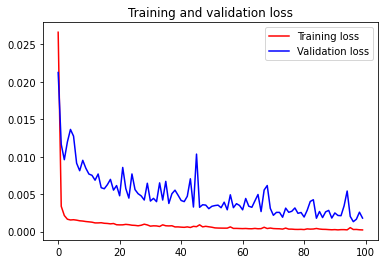

<Figure size 432x288 with 0 Axes>

In [49]:
### plot a graph for training and validation loss to visualize the results of model training

import matplotlib.pyplot as plt

loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(len(loss))

plt.plot(epochs, loss, 'r', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.legend(loc='best')
plt.figure()


plt.show()

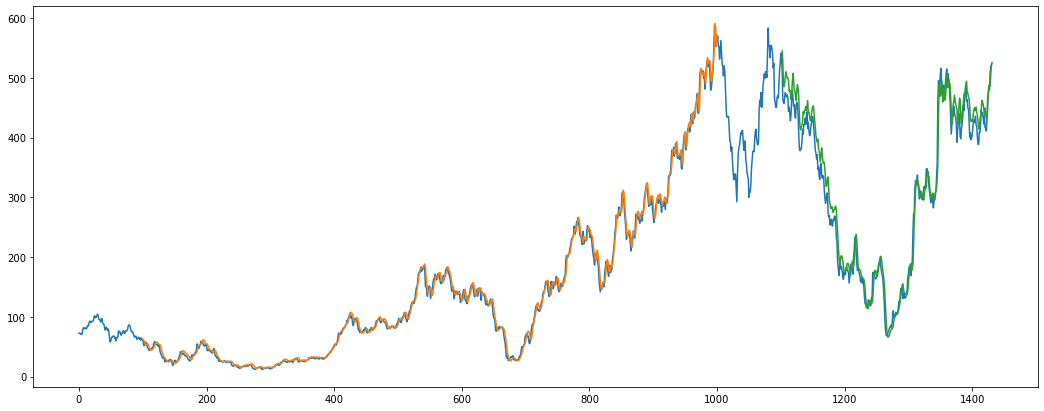

In [50]:
# shift train predictions for plotting
look_back=100
trainPredictPlot = numpy.empty_like(df1)  ## to take same shape and sata type of df1
trainPredictPlot[:, :] = np.nan
trainPredictPlot[look_back:len(train_predict)+look_back, :] = train_predict
# shift test predictions for plotting
testPredictPlot = numpy.empty_like(df1)
testPredictPlot[:, :] = numpy.nan
testPredictPlot[len(train_predict)+(look_back*2)+1:len(df1)-1, :] = test_predict
# plot baseline and predictions
plt1 = plt.figure(figsize=(18,7))
plt.plot(scaler.inverse_transform(df1))
plt.plot(trainPredictPlot)
plt.plot(testPredictPlot)
plt.show()

In [51]:
len(test_data)

430

In [52]:
x_input=test_data[330:].reshape(1,-1)
x_input.shape

(1, 100)

In [53]:
temp_input=list(x_input)
temp_input=temp_input[0].tolist()

In [54]:
temp_input

[0.5323402418304823,
 0.517313633555905,
 0.5041002637324289,
 0.4848311618993203,
 0.4996148520766205,
 0.5004997975049842,
 0.49054423821821935,
 0.4693360437591397,
 0.48738186016939067,
 0.49418810234569976,
 0.5138606423471891,
 0.517660679077537,
 0.55493220736386,
 0.5981727724710676,
 0.7782578724341876,
 0.8393099857805123,
 0.8302523719641571,
 0.8246954920771232,
 0.8583969069836622,
 0.8751023210953203,
 0.8205354044877646,
 0.7966941110847748,
 0.8233463895467253,
 0.8258623927962314,
 0.7816327866083022,
 0.8055955443552633,
 0.8320569684321141,
 0.8590215762138012,
 0.8729376684730198,
 0.8301395840229933,
 0.8588307006473702,
 0.8454178132743191,
 0.8357355408184907,
 0.790759811647117,
 0.7413420290049744,
 0.6838730423188115,
 0.7101305696058543,
 0.732457943244768,
 0.7350780527372978,
 0.7647668762545382,
 0.7438869306507297,
 0.7382881152580709,
 0.7305665880440694,
 0.7132321916536998,
 0.6599449795924146,
 0.6949434544985054,
 0.7133883695519,
 0.7436324510768199

In [55]:
# demonstrate prediction for next 10 days
from numpy import array

lst_output=[]
n_steps=100
i=0
while(i<30):
    
    if(len(temp_input)>100):
        #print(temp_input)
        x_input=np.array(temp_input[1:])
        print("{} day input {}".format(i,x_input))
        x_input=x_input.reshape(1,-1)
        x_input = x_input.reshape((1, n_steps, 1))
        #print(x_input)
        yhat = model.predict(x_input, verbose=0)
        print("{} day output {}".format(i,yhat))
        temp_input.extend(yhat[0].tolist())
        temp_input=temp_input[1:]
        #print(temp_input)
        lst_output.extend(yhat.tolist())
        i=i+1
    else:
        x_input = x_input.reshape((1, n_steps,1))
        yhat = model.predict(x_input, verbose=0)
        print(yhat[0])
        temp_input.extend(yhat[0].tolist())
        print(len(temp_input))
        lst_output.extend(yhat.tolist())
        i=i+1
    

print(lst_output)

[0.8867766]
101
1 day input [0.51731363 0.50410026 0.48483116 0.49961485 0.5004998  0.49054424
 0.46933604 0.48738186 0.4941881  0.51386064 0.51766068 0.55493221
 0.59817277 0.77825787 0.83930999 0.83025237 0.82469549 0.85839691
 0.87510232 0.8205354  0.79669411 0.82334639 0.82586239 0.78163279
 0.80559554 0.83205697 0.85902158 0.87293767 0.83013958 0.8588307
 0.84541781 0.83573554 0.79075981 0.74134203 0.68387304 0.71013057
 0.73245794 0.73507805 0.76476688 0.74388693 0.73828812 0.73056659
 0.71323219 0.65994498 0.69494345 0.71338837 0.74363245 0.72933462
 0.67639445 0.67016517 0.69902113 0.71156644 0.73021955 0.76499246
 0.75230832 0.7977005  0.80294072 0.8172776  0.77864829 0.7834634
 0.76067188 0.75617777 0.72317476 0.67445105 0.68746485 0.66711126
 0.67212591 0.68397282 0.70762759 0.71871969 0.72549988 0.71755279
 0.73594563 0.71061209 0.70450427 0.67502366 0.65427096 0.65395863
 0.68904387 0.68775983 0.71496737 0.75440789 0.74312927 0.7455932
 0.73263146 0.71291988 0.7376331  0.7

9 day output [[0.91342896]]
10 day input [0.51386064 0.51766068 0.55493221 0.59817277 0.77825787 0.83930999
 0.83025237 0.82469549 0.85839691 0.87510232 0.8205354  0.79669411
 0.82334639 0.82586239 0.78163279 0.80559554 0.83205697 0.85902158
 0.87293767 0.83013958 0.8588307  0.84541781 0.83573554 0.79075981
 0.74134203 0.68387304 0.71013057 0.73245794 0.73507805 0.76476688
 0.74388693 0.73828812 0.73056659 0.71323219 0.65994498 0.69494345
 0.71338837 0.74363245 0.72933462 0.67639445 0.67016517 0.69902113
 0.71156644 0.73021955 0.76499246 0.75230832 0.7977005  0.80294072
 0.8172776  0.77864829 0.7834634  0.76067188 0.75617777 0.72317476
 0.67445105 0.68746485 0.66711126 0.67212591 0.68397282 0.70762759
 0.71871969 0.72549988 0.71755279 0.73594563 0.71061209 0.70450427
 0.67502366 0.65427096 0.65395863 0.68904387 0.68775983 0.71496737
 0.75440789 0.74312927 0.7455932  0.73263146 0.71291988 0.7376331
 0.70320289 0.69971518 0.69260531 0.72482894 0.7842876  0.79948773
 0.81022847 0.81328671

18 day output [[0.97174084]]
19 day input [0.87510232 0.8205354  0.79669411 0.82334639 0.82586239 0.78163279
 0.80559554 0.83205697 0.85902158 0.87293767 0.83013958 0.8588307
 0.84541781 0.83573554 0.79075981 0.74134203 0.68387304 0.71013057
 0.73245794 0.73507805 0.76476688 0.74388693 0.73828812 0.73056659
 0.71323219 0.65994498 0.69494345 0.71338837 0.74363245 0.72933462
 0.67639445 0.67016517 0.69902113 0.71156644 0.73021955 0.76499246
 0.75230832 0.7977005  0.80294072 0.8172776  0.77864829 0.7834634
 0.76067188 0.75617777 0.72317476 0.67445105 0.68746485 0.66711126
 0.67212591 0.68397282 0.70762759 0.71871969 0.72549988 0.71755279
 0.73594563 0.71061209 0.70450427 0.67502366 0.65427096 0.65395863
 0.68904387 0.68775983 0.71496737 0.75440789 0.74312927 0.7455932
 0.73263146 0.71291988 0.7376331  0.70320289 0.69971518 0.69260531
 0.72482894 0.7842876  0.79948773 0.81022847 0.81328671 0.86148553
 0.88220352 0.88345283 0.89132619 0.88677663 0.88448268 0.88349611
 0.88505697 0.8887465  

27 day output [[1.0345576]]
28 day input [0.87293767 0.83013958 0.8588307  0.84541781 0.83573554 0.79075981
 0.74134203 0.68387304 0.71013057 0.73245794 0.73507805 0.76476688
 0.74388693 0.73828812 0.73056659 0.71323219 0.65994498 0.69494345
 0.71338837 0.74363245 0.72933462 0.67639445 0.67016517 0.69902113
 0.71156644 0.73021955 0.76499246 0.75230832 0.7977005  0.80294072
 0.8172776  0.77864829 0.7834634  0.76067188 0.75617777 0.72317476
 0.67445105 0.68746485 0.66711126 0.67212591 0.68397282 0.70762759
 0.71871969 0.72549988 0.71755279 0.73594563 0.71061209 0.70450427
 0.67502366 0.65427096 0.65395863 0.68904387 0.68775983 0.71496737
 0.75440789 0.74312927 0.7455932  0.73263146 0.71291988 0.7376331
 0.70320289 0.69971518 0.69260531 0.72482894 0.7842876  0.79948773
 0.81022847 0.81328671 0.86148553 0.88220352 0.88345283 0.89132619
 0.88677663 0.88448268 0.88349611 0.88505697 0.8887465  0.89369607
 0.89903164 0.90417355 0.90892988 0.91342896 0.91797316 0.92288405
 0.92839026 0.93457675

In [56]:
day_new=np.arange(1,101)
day_pred=np.arange(101,131)

In [57]:
import matplotlib.pyplot as plt

In [58]:
len(df1)

1432

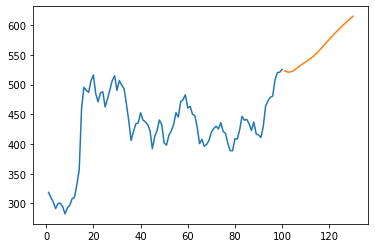

In [59]:
## plot for 30 days prediction
plt.plot(day_new,scaler.inverse_transform(df1[1332:]))
plt.plot(day_pred,scaler.inverse_transform(lst_output))

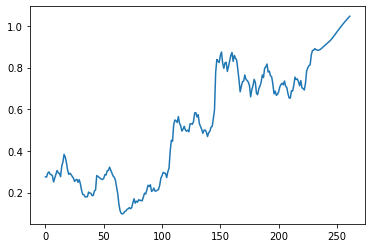

In [60]:
df3=df1.tolist()
df3.extend(lst_output)
plt.plot(df3[1200:])

In [61]:
df3=scaler.inverse_transform(df3).tolist()

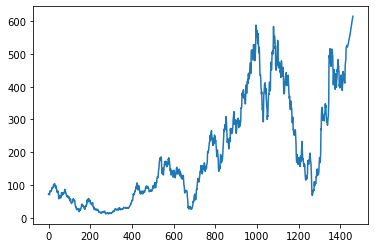

In [62]:
plt.plot(df3)


In [63]:
# Generate buy and sell signals
buy_signals = []
sell_signals = []
for i in range(len(test_predict)):
    if i == 0:
        continue
    if test_predict[i] > test_predict[i - 1]:
        buy_signals.append(df.index[train_size + time_step + i])
    else:
        sell_signals.append(df.index[train_size + time_step + i])


In [64]:
buy_signals

[Timestamp('2017-03-12 00:00:00', freq='W-SUN'),
 Timestamp('2017-03-19 00:00:00', freq='W-SUN'),
 Timestamp('2017-03-26 00:00:00', freq='W-SUN'),
 Timestamp('2017-04-16 00:00:00', freq='W-SUN'),
 Timestamp('2017-05-07 00:00:00', freq='W-SUN'),
 Timestamp('2017-05-28 00:00:00', freq='W-SUN'),
 Timestamp('2017-06-04 00:00:00', freq='W-SUN'),
 Timestamp('2017-06-11 00:00:00', freq='W-SUN'),
 Timestamp('2017-07-23 00:00:00', freq='W-SUN'),
 Timestamp('2017-07-30 00:00:00', freq='W-SUN'),
 Timestamp('2017-09-10 00:00:00', freq='W-SUN'),
 Timestamp('2017-09-17 00:00:00', freq='W-SUN'),
 Timestamp('2017-09-24 00:00:00', freq='W-SUN'),
 Timestamp('2017-10-01 00:00:00', freq='W-SUN'),
 Timestamp('2017-10-15 00:00:00', freq='W-SUN'),
 Timestamp('2017-10-22 00:00:00', freq='W-SUN'),
 Timestamp('2017-10-29 00:00:00', freq='W-SUN'),
 Timestamp('2017-11-12 00:00:00', freq='W-SUN'),
 Timestamp('2017-11-19 00:00:00', freq='W-SUN'),
 Timestamp('2017-12-03 00:00:00', freq='W-SUN'),
 Timestamp('2017-12-

In [65]:
# Print buy and sell signals
print("Buy signals:")
for signal in buy_signals:
    print(signal.date())
print("Sell signals:")
for signal in sell_signals:
    print(signal.date())

Buy signals:
2017-03-12
2017-03-19
2017-03-26
2017-04-16
2017-05-07
2017-05-28
2017-06-04
2017-06-11
2017-07-23
2017-07-30
2017-09-10
2017-09-17
2017-09-24
2017-10-01
2017-10-15
2017-10-22
2017-10-29
2017-11-12
2017-11-19
2017-12-03
2017-12-24
2017-12-31
2018-01-07
2018-01-14
2018-01-21
2018-03-11
2018-04-15
2018-04-22
2018-05-20
2018-06-17
2018-06-24
2018-07-01
2018-08-12
2018-09-02
2018-09-09
2018-09-16
2018-09-23
2018-11-11
2018-11-18
2018-11-25
2018-12-30
2019-01-06
2019-01-13
2019-01-20
2019-01-27
2019-02-03
2019-03-10
2019-03-17
2019-03-24
2019-04-14
2019-04-21
2019-04-28
2019-05-05
2019-09-22
2019-09-29
2019-10-06
2019-10-27
2019-11-03
2019-11-10
2019-11-17
2019-11-24
2019-12-29
2020-01-05
2020-01-12
2020-01-19
2020-01-26
2020-04-26
2020-05-03
2020-05-10
2020-05-17
2020-05-24
2020-05-31
2020-06-07
2020-06-14
2020-06-21
2020-06-28
2020-07-05
2020-07-12
2020-07-19
2020-07-26
2020-08-02
2020-08-09
2020-08-16
2020-08-23
2020-08-30
2020-09-06
2020-09-13
2020-09-20
2020-09-27
2020-11-

In [66]:
test_predict[3]

array([485.23], dtype=float32)

In [67]:
test_predict[2]

array([490.17007], dtype=float32)

In [68]:
test_predict[1]

array([528.9072], dtype=float32)

In [69]:
test_predict[0]

array([544.99677], dtype=float32)

In [70]:
test_predict

array([[544.99677 ],
       [528.9072  ],
       [490.17007 ],
       [485.23    ],
       [491.13858 ],
       [502.72183 ],
       [510.0984  ],
       [504.9007  ],
       [498.99036 ],
       [499.55865 ],
       [495.65176 ],
       [477.2961  ],
       [479.4036  ],
       [473.4292  ],
       [464.05066 ],
       [471.833   ],
       [494.03345 ],
       [507.47968 ],
       [494.77554 ],
       [478.57187 ],
       [478.00406 ],
       [468.11    ],
       [462.31042 ],
       [480.1121  ],
       [488.36618 ],
       [482.5103  ],
       [468.0493  ],
       [439.25595 ],
       [416.97125 ],
       [412.81393 ],
       [417.3724  ],
       [420.37457 ],
       [427.12982 ],
       [443.0214  ],
       [439.12488 ],
       [444.95193 ],
       [446.0936  ],
       [452.0684  ],
       [445.61664 ],
       [453.77866 ],
       [462.04187 ],
       [441.96527 ],
       [442.84552 ],
       [435.82373 ],
       [428.1032  ],
       [428.79694 ],
       [439.72653 ],
       [446.7

In [71]:
# Print the predicted prices
print("Predicted prices:")
for prediction in test_predict:
    print(prediction[0])

Predicted prices:
544.99677
528.9072
490.17007
485.23
491.13858
502.72183
510.0984
504.9007
498.99036
499.55865
495.65176
477.2961
479.4036
473.4292
464.05066
471.833
494.03345
507.47968
494.77554
478.57187
478.00406
468.11
462.31042
480.1121
488.36618
482.5103
468.0493
439.25595
416.97125
412.81393
417.3724
420.37457
427.12982
443.0214
439.12488
444.95193
446.0936
452.0684
445.61664
453.77866
462.04187
441.96527
442.84552
435.82373
428.1032
428.79694
439.72653
446.78555
451.5579
453.013
442.1273
429.3283
415.39084
402.45963
398.2551
392.89087
396.9322
381.6262
377.15576
367.2817
359.6793
373.23825
382.69727
369.10953
357.8118
357.6563
358.70325
344.37308
328.522
317.96002
320.08344
329.98166
334.16476
312.19824
294.05197
289.79184
281.6204
281.17667
284.40002
280.2791
274.74747
278.00787
280.2421
284.062
285.16855
275.75912
256.70218
241.8701
218.79837
201.80966
189.93329
190.5878
200.75235
202.24852
200.30995
194.3218
185.21634
175.8051
175.91078
177.45491
178.25687
183.12941
189.054

In [72]:
test_predict[-1]

array([520.8022], dtype=float32)

In [73]:
from smartapi import SmartConnect
import requests
import pandas as pd
import datetime
import time
import pyotp

In [74]:
user_name = ""    # angel broking user id
password = ""  # angel broking password
api_key= ""  # angel broking api key
token1=""  # angel broking token generated using TOTP
feed_token = None
token_map = None

In [75]:
obj=SmartConnect(api_key=api_key)
data = obj.generateSession(user_name,password,pyotp.TOTP(token1).now())

In [76]:
df.columns

Index(['Close'], dtype='object')

In [77]:
df['Close'][-2]

520.9

In [78]:
test_predict[-1]

array([520.8022], dtype=float32)

In [79]:
def place_order(symbol,token,qty,exch_seg,buy_sell,ordertype,price):
    try:
        orderparams = {
            "variety": "NORMAL",
            "tradingsymbol": symbol,
            "symboltoken": token,
            "transactiontype": buy_sell,
            "exchange": exch_seg,
            "ordertype": ordertype,
            "producttype": "DELIVERY",
            "duration": "DAY",
            "price": price,
            "quantity": qty
            }
        orderId=obj.placeOrder(orderparams)
        print("The order id is: {}".format(orderId))
    except Exception as e:
        print("Order placement failed: {}".format(e))

In [80]:

def enter_in_trade():
    if test_predict[-1] > df['Close'][-2]:
        if df['Close'][-2] < df['Close'][-3]:
            print('Placing BUY order')
            place_order("TATAMOTORS-EQ","3456",100,'NSE','BUY','MARKET',0)
        
    if test_predict[-1] < df['Close'][-2]:
        if df['Close'][-2] > df['Close'][-3]:
            print('Placing SELL order')
            place_order("TATAMOTORS-EQ","3456",100,'NSE','SELL','MARKET',0)

In [81]:
place_order("TATAMOTORS-EQ","3456",100,'NSE','BUY','MARKET',0)

The order id is: 230601000945160


In [84]:
def checkTime():
    x = 1
    while x == 1:
        dt = datetime.datetime.now()
        if( dt.weekday()==3 and dt.hour >= 17 and dt.minute >= 25 and dt.second >= 0 ):
            print("time reached")
            x = 2
            enter_in_trade()
        else:
            time.sleep(3)
            print(dt , " Waiting for Time to check new ATM ")

In [85]:
checkTime()

2023-06-01 17:24:02.783134  Waiting for Time to check new ATM 
2023-06-01 17:24:05.793276  Waiting for Time to check new ATM 
2023-06-01 17:24:08.804352  Waiting for Time to check new ATM 
2023-06-01 17:24:11.810197  Waiting for Time to check new ATM 
2023-06-01 17:24:14.817180  Waiting for Time to check new ATM 
2023-06-01 17:24:17.827313  Waiting for Time to check new ATM 
2023-06-01 17:24:20.830332  Waiting for Time to check new ATM 
2023-06-01 17:24:23.840302  Waiting for Time to check new ATM 
2023-06-01 17:24:26.854409  Waiting for Time to check new ATM 
2023-06-01 17:24:29.854633  Waiting for Time to check new ATM 
2023-06-01 17:24:32.858619  Waiting for Time to check new ATM 
2023-06-01 17:24:35.868037  Waiting for Time to check new ATM 
2023-06-01 17:24:38.871968  Waiting for Time to check new ATM 
2023-06-01 17:24:41.876756  Waiting for Time to check new ATM 
2023-06-01 17:24:44.882958  Waiting for Time to check new ATM 
2023-06-01 17:24:47.889292  Waiting for Time to check n